In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data set
file_path = "../data/ecommerce_sales.xlsx"

# Read the file 
df = pd.read_excel(file_path) 

# View the first 5 rows
df.head()

,Date,Customer ID,Product Category,Product Name,Quantity Sold,Price,Discount Applied,Payment Method,Total Sales
0,2024-01-01,b269ef97,Books,Laptop,3,352.10,0.16,Credit Card,887.2920
1,2024-01-02,791440fc,Electronics,Novel,4,272.69,0.14,PayPal,938.0536
2,2024-01-03,cc917c87,Clothing,Vacuum,1,161.67,0.01,Credit Card,160.0533
3,2024-01-04,39386f53,Clothing,Board Game,3,408.76,0.10,Credit Card,1103.6520
4,2024-01-05,59e8fa53,Books,Shoes,3,345.52,0.11,Credit Card,922.5384


In [3]:
# Checking for Missing values
df.isnull().sum()


Date                0
Customer ID         0
Product Category    0
Product Name        0
Quantity Sold       0
Price               0
Discount Applied    0
Payment Method      0
Total Sales         0
dtype: int64

In [4]:
# Convert date column to proper format
df["Date"] = pd.to_datetime(df["Date"] , format="%d-%m-%Y")

In [5]:
# Creating a new column for revenue
df["Revenue"] = df["Quantity Sold"] * df["Price"] * (1 - df["Discount Applied"])

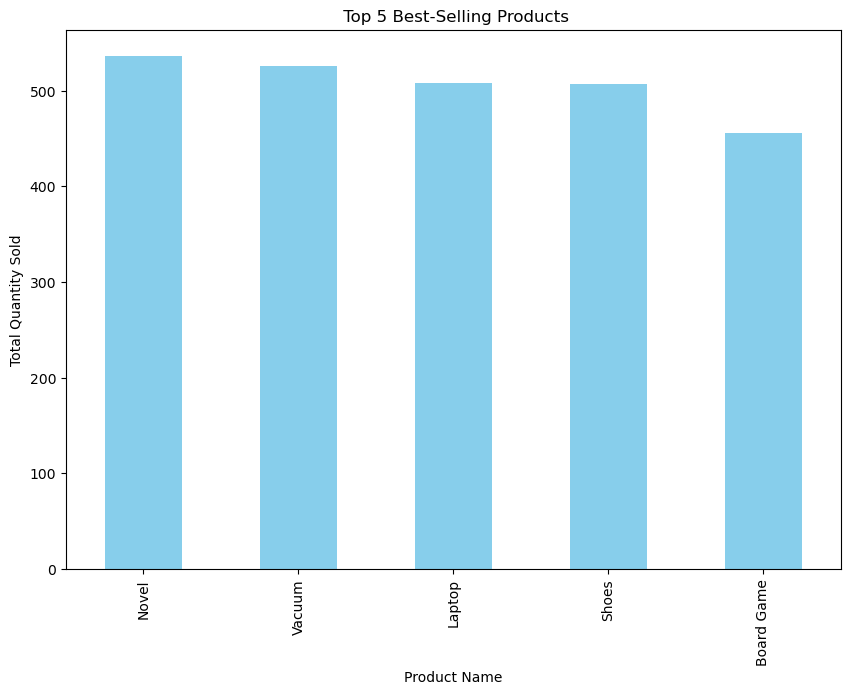

In [6]:
""" 
(EDA) Exploratory Data Analysis

Top 5 best selling products

"""
top_products = df.groupby("Product Name")["Quantity Sold"].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10,7))
top_products.plot(kind="bar", color="skyblue")
plt.title(" Top 5 Best-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product Name")
plt.show()

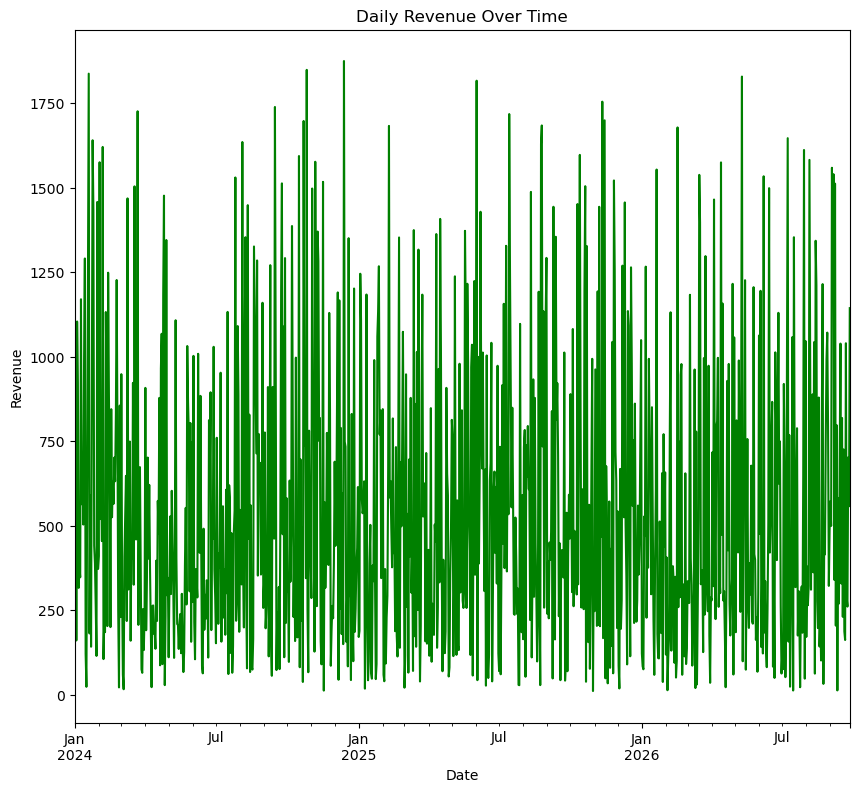

In [7]:
# Sales Trend over Time

df.groupby("Date")["Revenue"].sum().plot(figsize=(10,9), title="Daily Revenue Over Time", color="green")
plt.ylabel("Revenue")
plt.show()

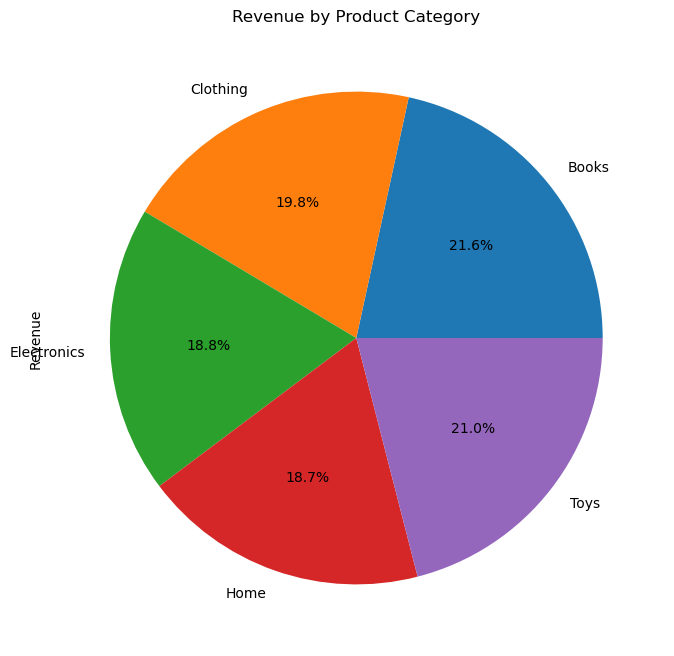

In [8]:
# Sales breakdown by Category
df.groupby("Product Category")["Revenue"].sum().plot(kind="pie", autopct="%1.1f%%", figsize=(8,8))
plt.title('Revenue by Product Category')
plt.show()

### Insights & Business Recommendations 

- Invest in promoting these products
- If revenue spikes on certain dates, marketing campaigns show align with those trends
- Focus efforts on high-revenue categories
